In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import statsmodels.api as sm
from sklearn.model_selection import train_test_split # data split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from nltk.corpus import stopwords
import nltk
from sklearn.metrics import (confusion_matrix, classification_report)

In [24]:
df = pd.read_csv("../dados/df_setorizado.csv")

In [25]:
pd.set_option('display.max_columns', None)  # Exibe todas as colunas
df['decisao_tribunal'].value_counts()

decisao_tribunal
condenacao      559
arquivamento    172
vazio           163
Name: count, dtype: int64

In [26]:
df['descricao_tipo_documento'].value_counts()

descricao_tipo_documento
Voto                            582
Voto Processo Administrativo    237
Voto Embargos de Declaração      75
Name: count, dtype: int64

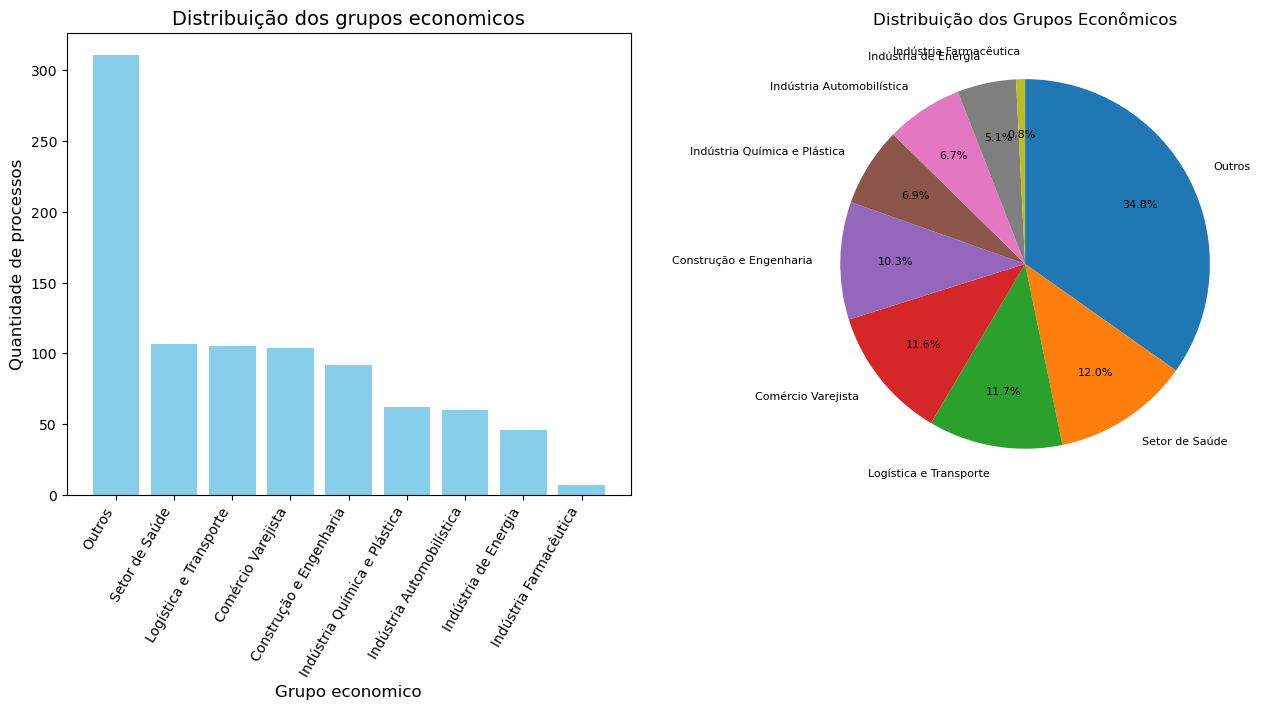

In [27]:
plt.figure(figsize=(16,6))

contagem = df['grupo_setor'].value_counts()

plt.subplot(121)
plt.bar(contagem.index, contagem.values, color='skyblue')
#plt.plot(contagem.index, contagem.values, color='blue', marker='o', linestyle='--', label='Tendência')
plt.title('Distribuição dos grupos economicos', fontsize = 14)
plt.xlabel('Grupo economico', fontsize = 12)
plt.ylabel('Quantidade de processos', fontsize = 12)
plt.xticks(rotation=60, ha='right')
plt.yticks(fontsize = 10)


plt.subplot(122)
plt.pie(
    contagem.values, 
    labels=contagem.index, 
    autopct='%1.1f%%',        
    startangle=90,            
    counterclock=False,
    labeldistance=1.15,
    pctdistance=0.7,
    textprops={'fontsize': 8}  
)
plt.title('Distribuição dos Grupos Econômicos')

plt.show()

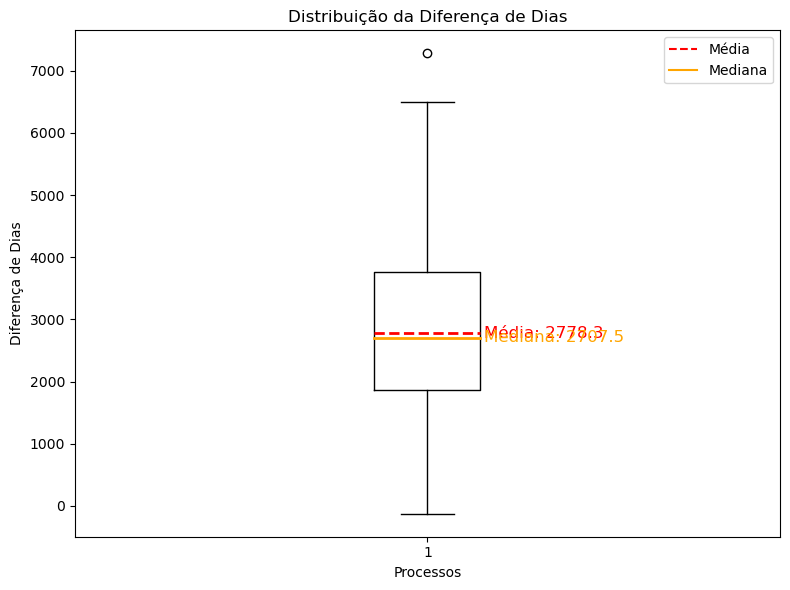

In [28]:
# Supondo que df já está definido
dados = df['diferenca_dias']

media = np.mean(dados)
mediana = np.median(dados)

fig, ax = plt.subplots(figsize=(8,6))

box = ax.boxplot(dados, showmeans=True, meanline=True,
                 meanprops=dict(color='red', linewidth=2),
                 medianprops=dict(color='orange', linewidth=2))

ax.set_title('Distribuição da Diferença de Dias')
ax.set_xlabel('Processos')
ax.set_ylabel('Diferença de Dias')

# Adiciona legenda
ax.annotate(f'Média: {media:.1f}', xy=(1.08, media), xycoords=('data', 'data'),
            color='red', fontsize=12, va='center')
ax.annotate(f'Mediana: {mediana:.1f}', xy=(1.08, mediana), xycoords=('data', 'data'),
            color='orange', fontsize=12, va='center')

# Adiciona legenda
import matplotlib.lines as mlines
mean_line = mlines.Line2D([], [], color='red',linestyle='--', label='Média')
median_line = mlines.Line2D([], [], color='orange', label='Mediana')
ax.legend(handles=[mean_line, median_line])

plt.tight_layout()
plt.show()

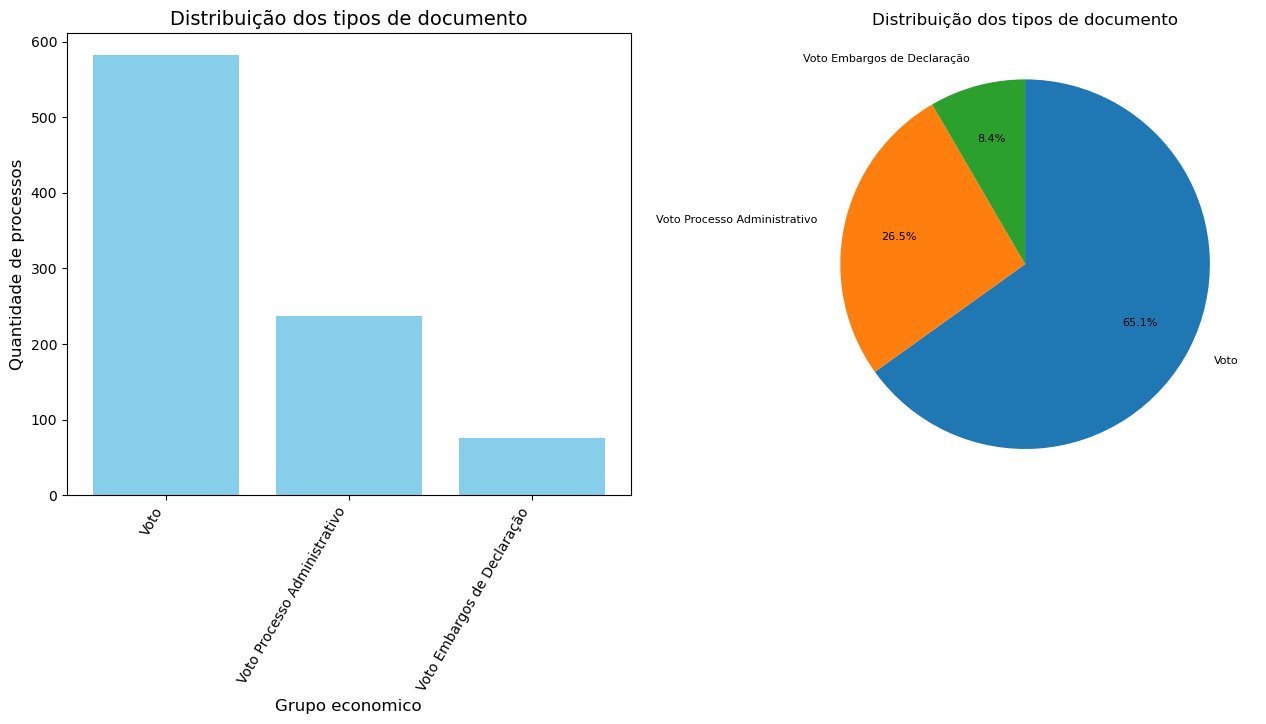

In [29]:
plt.figure(figsize=(16,6))

contagem = df['descricao_tipo_documento'].value_counts()

plt.subplot(121)
plt.bar(contagem.index, contagem.values, color='skyblue')
#plt.plot(contagem.index, contagem.values, color='blue', marker='o', linestyle='--', label='Tendência')
plt.title('Distribuição dos tipos de documento', fontsize = 14)
plt.xlabel('Grupo economico', fontsize = 12)
plt.ylabel('Quantidade de processos', fontsize = 12)
plt.xticks(rotation=60, ha='right')
plt.yticks(fontsize = 10)


plt.subplot(122)
plt.pie(
    contagem.values, 
    labels=contagem.index, 
    autopct='%1.1f%%',        
    startangle=90,            
    counterclock=False,
    labeldistance=1.15,
    pctdistance=0.7,
    textprops={'fontsize': 8}  
)
plt.title('Distribuição dos tipos de documento')

plt.show()

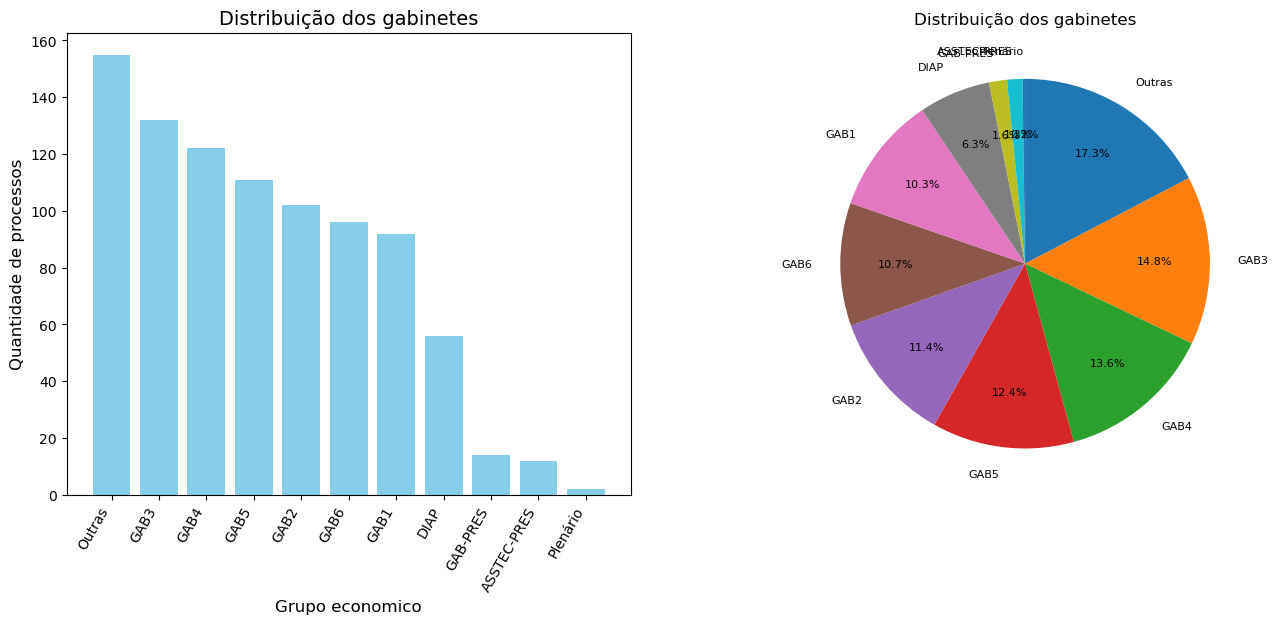

In [30]:
plt.figure(figsize=(16,6))

contagem = df['sigla_unidade'].value_counts()

plt.subplot(121)
plt.bar(contagem.index, contagem.values, color='skyblue')
#plt.plot(contagem.index, contagem.values, color='blue', marker='o', linestyle='--', label='Tendência')
plt.title('Distribuição dos gabinetes', fontsize = 14)
plt.xlabel('Grupo economico', fontsize = 12)
plt.ylabel('Quantidade de processos', fontsize = 12)
plt.xticks(rotation=60, ha='right')
plt.yticks(fontsize = 10)


plt.subplot(122)
plt.pie(
    contagem.values, 
    labels=contagem.index, 
    autopct='%1.1f%%',        
    startangle=90,            
    counterclock=False,
    labeldistance=1.15,
    pctdistance=0.7,
    textprops={'fontsize': 8}  
)
plt.title('Distribuição dos gabinetes')

plt.show()

In [31]:
#df_condenados = df.loc[df['decisao_tribunal'] == 'condenacao']


# Supondo que seu DataFrame se chama df
# Crie uma coluna binária: 1 para condenado, 0 para outros
df['taxa_condenacao_gabinete'] = (df['decisao_tribunal'] == 'condenacao').astype(int)

# Agrupe por gabinete e calcule a taxa de condenação
taxa_condenacao = df.groupby('sigla_unidade')['taxa_condenacao_gabinete'].mean().reset_index()
print(taxa_condenacao)
taxa_condenacao.columns = ['sigla_unidade', 'taxa_condenacao']


   sigla_unidade  taxa_condenacao_gabinete
0    ASSTEC-PRES                  0.916667
1           DIAP                  0.750000
2       GAB-PRES                  0.714286
3           GAB1                  0.706522
4           GAB2                  0.843137
5           GAB3                  0.772727
6           GAB4                  0.745902
7           GAB5                  0.729730
8           GAB6                  0.718750
9         Outras                  0.000000
10      Plenário                  1.000000


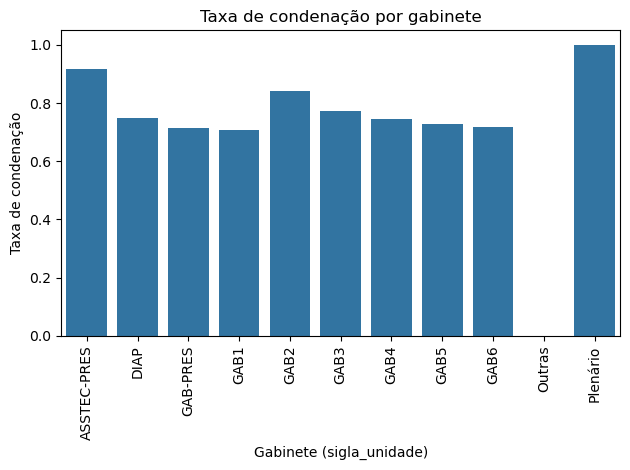

In [32]:
sb.barplot(x='sigla_unidade', y='taxa_condenacao', data=taxa_condenacao)
plt.xticks(rotation=90)
plt.title('Taxa de condenação por gabinete')
plt.xlabel('Gabinete (sigla_unidade)')
plt.ylabel('Taxa de condenação')
plt.tight_layout()
plt.show()

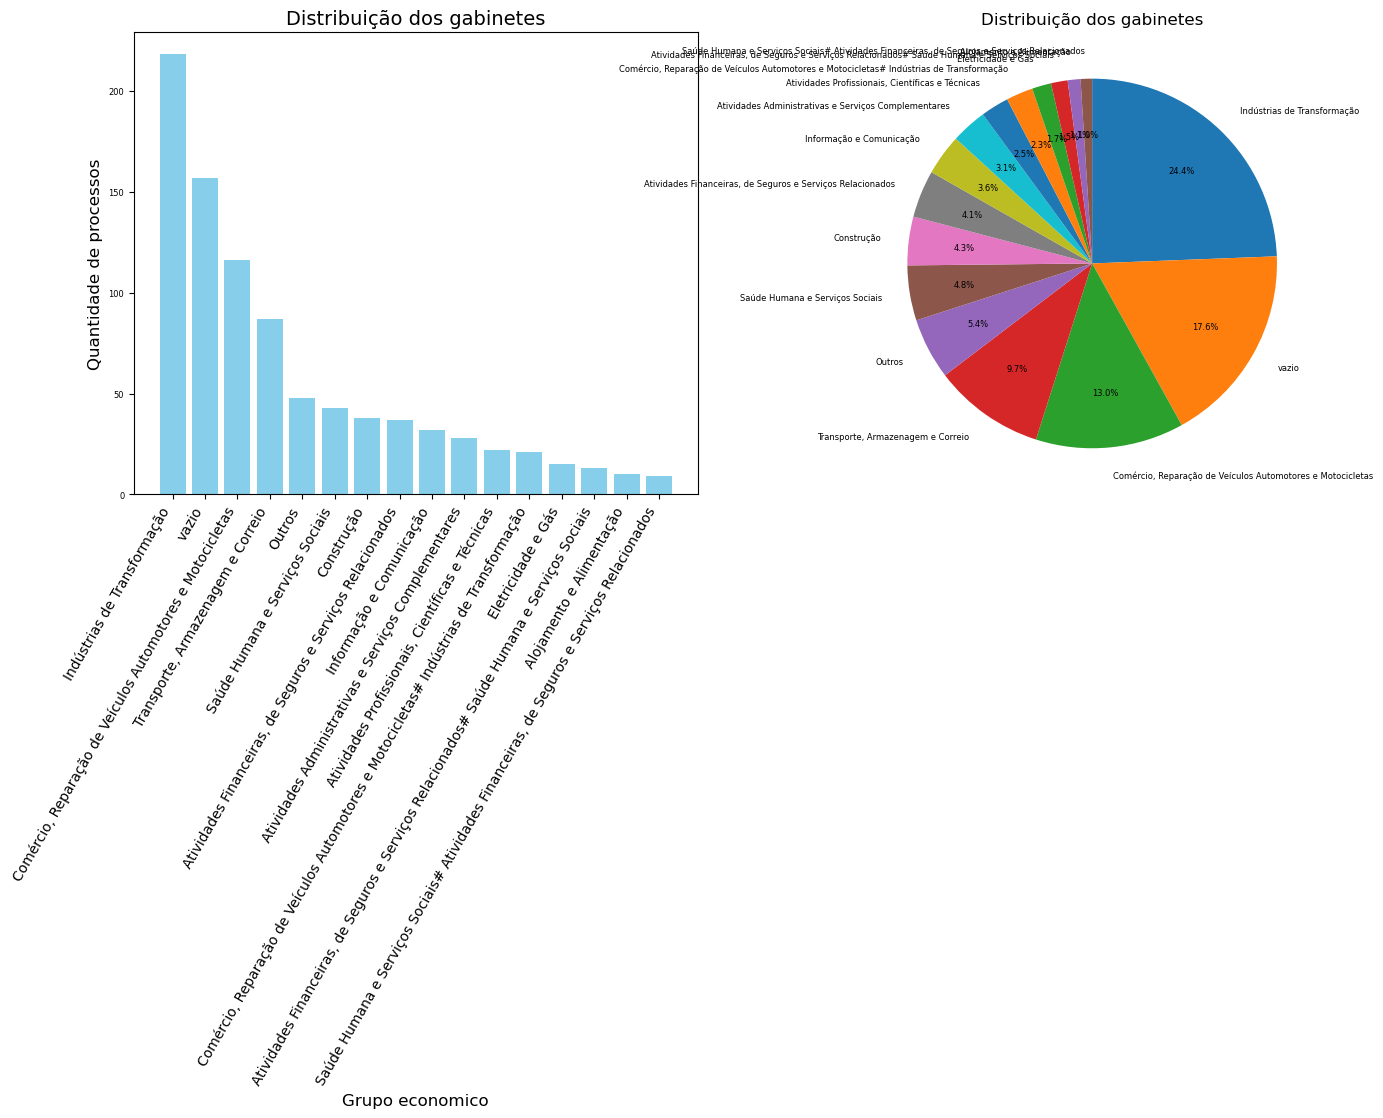

In [33]:
plt.figure(figsize=(16,6))

contagem = df['setor_economico_secao'].value_counts()

plt.subplot(121)
plt.bar(contagem.index, contagem.values, color='skyblue')
#plt.plot(contagem.index, contagem.values, color='blue', marker='o', linestyle='--', label='Tendência')
plt.title('Distribuição dos gabinetes', fontsize = 14)
plt.xlabel('Grupo economico', fontsize = 12)
plt.ylabel('Quantidade de processos', fontsize = 12)
plt.xticks(rotation=60, ha='right')
plt.yticks(fontsize = 6)


plt.subplot(122)
plt.pie(
    contagem.values, 
    labels=contagem.index, 
    autopct='%1.1f%%',        
    startangle=90,            
    counterclock=False,
    labeldistance=1.15,
    pctdistance=0.7,
    textprops={'fontsize': 6}  
)
plt.title('Distribuição dos gabinetes')

plt.show()

In [ ]:
df['grupo_setor'].value_counts()

grupo_setor
Outros                          311
Setor de Saúde                  107
Logística e Transporte          105
Comércio Varejista              104
Construção e Engenharia          92
Indústria Química e Plástica     62
Indústria Automobilística        60
Indústria de Energia             46
Indústria Farmacêutica            7
Name: count, dtype: int64

In [35]:
df['grupo_setor'] = df['grupo_setor'].replace(
    df['grupo_setor'].value_counts()[df['grupo_setor'].value_counts() < 2].index,
    'Outros')

df['grupo_setor'].value_counts()

grupo_setor
Outros                          311
Setor de Saúde                  107
Logística e Transporte          105
Comércio Varejista              104
Construção e Engenharia          92
Indústria Química e Plástica     62
Indústria Automobilística        60
Indústria de Energia             46
Indústria Farmacêutica            7
Name: count, dtype: int64

In [36]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/danilo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
df['descricao_especificacao'] = df['descricao_especificacao'].fillna('')
df['conteudo'] = df['conteudo'].fillna('')

In [38]:
stop_words_pt = stopwords.words('portuguese')

# 2. Pré-processamento básico
# Selecionar features e target
features = ['ano_documento', 'assinaturas', 'descricao_tipo_documento', 
           'decisao_tribunal', 'setor_economico_secao','grupo_setor', 'diferenca_dias',
           'sigla_unidade', 'taxa_condenacao_gabinete', 'descricao_especificacao','mercado_relevante', 'conteudo']
target = 'decisao_tribunal'  # Supondo que esta coluna exista nos dados

X = df[features]
y = df[target]

# 3. Divisão treino-teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42,
    stratify=X['grupo_setor']  # Estratificação por setor econômico
)


In [39]:
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X.select_dtypes(include=['number']).columns.tolist()

print(num_cols)
print(cat_cols)

['ano_documento', 'diferenca_dias', 'taxa_condenacao_gabinete']
['assinaturas', 'descricao_tipo_documento', 'decisao_tribunal', 'setor_economico_secao', 'grupo_setor', 'sigla_unidade', 'descricao_especificacao', 'mercado_relevante', 'conteudo']


In [40]:

# 4. Pipeline de pré-processamento
# Definir colunas por tipo
categorical_features = ['descricao_tipo_documento', 'decisao_tribunal', 'setor_economico_secao', 'mercado_relevante', 'sigla_unidade', 'assinaturas']
numerical_features = ['ano_documento', 'taxa_condenacao_gabinete', 'diferenca_dias']
text_features = ['descricao_especificacao', 'conteudo']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
        
    ],
    remainder='drop'
)



In [41]:
# Random Forest
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        min_samples_split=5,
        random_state=42,
        n_jobs=-1
    ))
])

# 6. Treinamento

rf_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [42]:
# 7. Avaliação
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    metrics = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R²': r2_score(y_test, y_pred)
    }
    r
    return metrics

In [ ]:
def detailed_classification_analysis(model, X_test, y_test, class_names=None):
    # Previsões
    y_pred = model.predict(X_test)
    
    # Cálculo das métricas
    report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    
    # 1. Matriz de Confusão Visual
    plt.figure(figsize=(10,7))
    sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, 
                yticklabels=class_names)
    plt.title('Matriz de Confusão')
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.show()
    
    # 2. Relatório de Classificação em DataFrame
    report_df = pd.DataFrame(report).transpose()
    print("\nRelatório de Classificação Detalhado:")
    display(report_df.round(2))
    
    # 3. Métricas Resumidas
    summary = {
        'Acurácia': report['accuracy'],
        'Precisão Média': report['weighted avg']['precision'],
        'Recall Médio': report['weighted avg']['recall'],
        'F1-Score Médio': report['weighted avg']['f1-score']
    }
    
    return summary, report_df

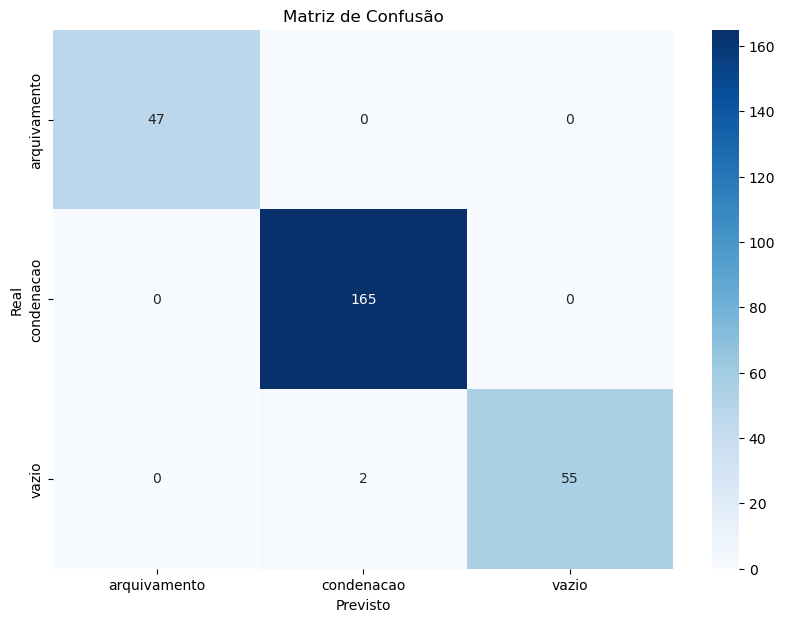


Relatório de Classificação Detalhado:


,precision,recall,f1-score,support
arquivamento,1.00,1.00,1.00,47.00
condenacao,0.99,1.00,0.99,165.00
vazio,1.00,0.96,0.98,57.00
accuracy,0.99,0.99,0.99,0.99
macro avg,1.00,0.99,0.99,269.00
weighted avg,0.99,0.99,0.99,269.00


In [44]:
# Supondo que você tenha um modelo treinado e dados de teste
summary_metrics, detailed_report = detailed_classification_analysis(
    model=rf_pipeline,
    X_test=X_test,
    y_test=y_test,
    class_names=['arquivamento', 'condenacao', 'vazio']  # Nomes das suas classes
)
